In [10]:
#!/usr/bin/env python
# # -*- coding: utf-8 -*-
#!/usr/bin/env python
#!pip install tensorflow==1.15

import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os, inspect
import argparse
import time
import seaborn as sns
# import matplotlib
# matplotlib.use("Qt5Agg")
# #matplotlib.use('Agg')
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
import pandas as pd
import sys,inspect
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Postprocess")
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Methods\\Models\\Utils")

import utils  # for utils.py
from utils import *
import global_utils  # for global_utils.py

# import utils
# from utils import *
# import sys
# sys.path.append('../Methods/Models/Utils')
# import global_utils

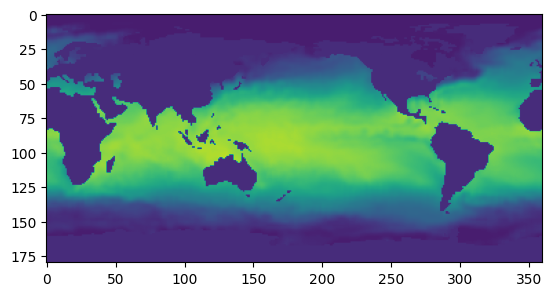

In [11]:
train_data = np.load('Data/sst_var_train',allow_pickle=True).data
test_data = np.load('Data/sst_var_test',allow_pickle=True).data
mask = np.load('Data/mask',allow_pickle=True)
#plt.imshow(train_data[0]*mask[0],vmin=-5,vmax=35)
plt.imshow(test_data[0]*mask[0],vmin=-5,vmax=35)

In [12]:
train_data_ml = train_data.reshape(427,180*360)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

train_data_ml = train_data_ml[:,mask]
train_data_ml.shape

# Find train data mean
train_data_mean = np.mean(train_data_ml,axis=0)
train_data_ml = train_data_ml - train_data_mean[None,]

In [13]:
test_data_ml = test_data.reshape(1487,180*360)
mask = np.load('Data/mask',allow_pickle=True)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

test_data_ml = test_data_ml[:,mask]
test_data_ml.shape

# Find train data mean
test_data_mean = np.mean(test_data_ml,axis=0)
test_data_ml = test_data_ml - test_data_mean[None,]

In [14]:
def field_compression(Y,K):
    '''
    Y - Snapshot matrix - shape: NxS
    K - number of modes to truncate to
    returns 
    V - truncated POD basis matrix - shape: NxK
    Ytilde - truncated coefficient matrix - shape: KxS
    '''
    V = generate_pod_bases(Y,K)
    Ytilde = field_coefficients(Y,V)

    return V, Ytilde

def generate_pod_bases(Y,K): #Mean removed
    '''
    Y - Snapshot matrix - shape: NxS
    returns V - truncated POD basis matrix - shape: NxK
    '''
    new_mat = np.matmul(np.transpose(Y),Y)
    w,v = np.linalg.eig(new_mat)

    # plt.figure()
    # plt.semilogy(w[:]/np.sum(w)*100)
    # plt.show()

    # Bases
    V = np.real(np.matmul(Y,v)) 
    trange = np.arange(np.shape(V)[1])
    V[:,trange] = V[:,trange]/np.sqrt(w[:])

    # Truncate phis
    V = V[:,0:K] # Columns are modes

    return V

def field_coefficients(Y,V):
    '''
    Y - Snapshot matrix - shape: NxS
    V - truncated POD basis matrix - shape: NxK
    returns Ytilde - shape: KxS
    '''
    return np.matmul(np.transpose(V),Y)

c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\hqr2-venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


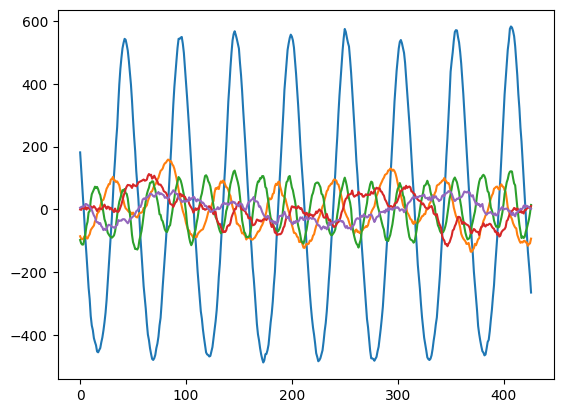

In [16]:
modes, coeffs = field_compression(train_data_ml.T,5)
plt.figure()
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.plot(coeffs[2,:])
plt.plot(coeffs[3,:])
plt.plot(coeffs[4,:])
plt.show()

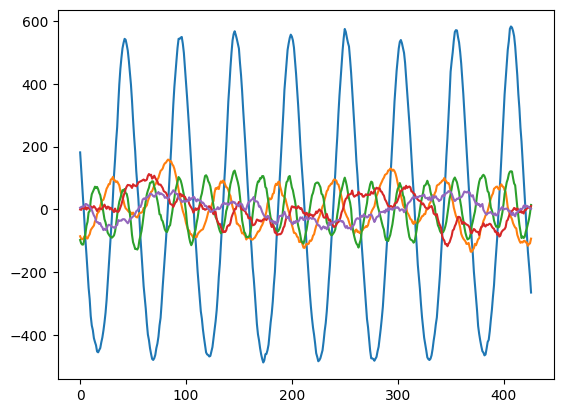

In [17]:
data_train = coeffs.T
plt.figure()
plt.plot(data_train[:,0])
plt.plot(data_train[:,1])
plt.plot(data_train[:,2])
plt.plot(data_train[:,3])
plt.plot(data_train[:,4])
plt.show()

c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\hqr2-venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


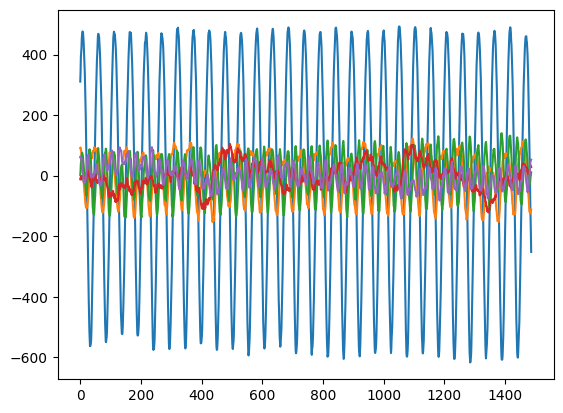

In [18]:
modes_test, coeffs_test = field_compression(test_data_ml.T,5)
plt.figure()
plt.plot(coeffs_test[0,:])
plt.plot(coeffs_test[1,:])
plt.plot(coeffs_test[2,:])
plt.plot(coeffs_test[3,:])
plt.plot(coeffs_test[4,:])
plt.show()

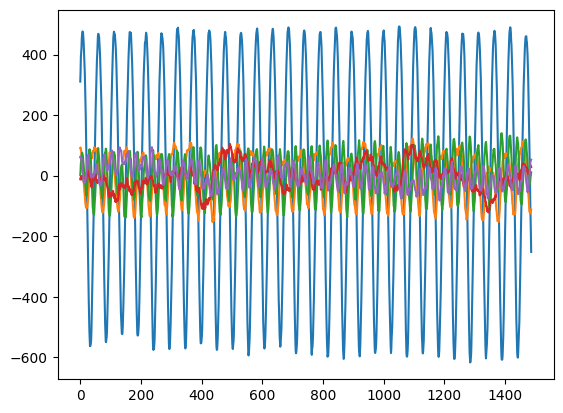

In [19]:
data_test = coeffs_test.T
plt.figure()
plt.plot(data_test[:,0])
plt.plot(data_test[:,1])
plt.plot(data_test[:,2])
plt.plot(data_test[:,3])
plt.plot(data_test[:,4])
plt.show()

In [31]:
# with open("./Simulation_Data/lorenz3D_data.pickle", "rb") as file:
#     # Pickle the "data" dictionary using the highest protocol available.
#     data = pickle.load(file)
#     u = data["u"]
#     sigma = data["sigma"]
#     beta = data["beta"]
#     rho = data["rho"]
#     dt = data["dt"]
n = data_train.shape[0]
dt = 1
N_train = 427
N_test = 1487
sigma = -1
beta = -1
rho = -1

# dudt = (u[1:]-u[:-1])/dt
# u = u[:-1,:]

# u_train = u[:N_train, :]
# u_test = u[N_train:N_train+N_test, :]

# dudt_train = dudt[:N_train, :]
# dudt_test = dudt[N_train:N_train+N_test, :]
u_train = data_train[:N_train,:]
u_test = data_test[:N_test,:]
#u_test = data_valid[:-1,:]
#dudt_train = (data_train[1:]-data_train[:-1])/dt #why du/dt
#dudt_train = dudt_train[:N_train]
#dudt_test = (data_valid[1:]-data_valid[:-1])/dt
#dudt_test = dudt_test[:]
train_input_sequence = u_train
#train_target_sequence = dudt_train
train_target_sequence = u_train
test_target_sequence = u_test
test_input_sequence = u_test
#test_target_sequence = dudt_test

print("Number of training samples: {}".format(train_input_sequence.shape))
print("Number of testing samples: {}".format(test_input_sequence.shape))

attractor_std = np.std(train_input_sequence, axis=0)

dl_max = 40
pl_max = 300
max_idx = np.shape(train_input_sequence)[0] - pl_max
min_idx = dl_max
np.random.seed(42)

idx = np.arange(min_idx, max_idx)
np.random.shuffle(idx)
testing_ic_indexes = idx
print(idx)
print("Shape of initial conditions: {:}".format(testing_ic_indexes.shape))

data = {
"train_input_sequence":train_input_sequence,
"train_target_sequence":train_target_sequence,
"attractor_std":attractor_std,
"dt":dt,"sigma":sigma,
"beta":beta,
"rho":rho,
}

with open("./Data/training_data_N{:d}.pickle".format(N_train), "wb") as file:
    # Pickle the "data" dictionary using the highest protocol available.
    pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)

data = {
"test_input_sequence":test_input_sequence,
"test_target_sequence":test_target_sequence,
"attractor_std":attractor_std,
"testing_ic_indexes":testing_ic_indexes,
"dt":dt,"sigma":sigma,
"beta":beta,
"rho":rho,
}

with open("./Data/testing_data_N{:d}.pickle".format(N_train), "wb") as file:
    # Pickle the "data" dictionary using the highest protocol available.
    pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)

Number of training samples: (427, 5)
Number of testing samples: (1487, 5)
[116  40  66  62  52 107  50  58  44 108 124 105  93 120 123 104  73 119
  95 113  51  70  80  68  49 106  45  79  71  75  85  84  56  82  74  47
  89 101  59 112  65  87  53  64  43  57  78  48 109  46  96  76 118 126
  94  83  90  86 125  55 110  67  81 102  98  88 117  97  72 122  99 103
 115  77  69  41  92  61  42  63 121 114  60 100 111  54  91]
Shape of initial conditions: (87,)


In [32]:
sysname, tidx = "SST", 2
file_path = os.path.abspath("data_analysis.ipynb")
current_directory = os.path.dirname(file_path)
mid_directory = os.path.dirname(current_directory)
parent_directory = os.path.dirname(mid_directory)

print("Current Directory:", current_directory)
print("Parent Directory:", parent_directory)

#current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
results_dir = os.path.join(os.path.dirname(mid_directory), "Results")  # Use os.path.join for path concatenation
print(results_dir)

eval_path = os.path.join(results_dir, sysname, 'Evaluation_Data')
print(eval_path)

model_path = os.path.join(results_dir, sysname, 'Trained_Models')
print(model_path)

fig_path = os.path.join(results_dir, sysname, 'Eval_Figures')
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)  # Use os.makedirs to create parent directories if needed
print(fig_path)

Current Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Data\SST
Parent Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Evaluation_Data
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Trained_Models
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Eval_Figures


In [12]:
maxLyp = 1.0
dt = 1
trained_models = None

In [11]:
models = [[os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_20-IUL_0-REG_1e-07-AU_0-NICS_3"),"HQR-5,V-10,DL=40,IPL=20,n_tests=3"],
          [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_8-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_8-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=8,IPL=8,n_tests=1"],
          [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=40,IPL=300,n_tests=1"]]
samples = ["HQR-5,V-10,DL=40,IPL=20,n_tests=3","HQR-5,V-10,DL=8,IPL=8,n_tests=1","HQR-5,V-10,DL=40,IPL=300,n_tests=1"]
title = "Sea Surface Temperatures"

In [13]:
rmse_dict = dict()
vpt_dict = dict()
targets = dict()
outputs = dict()
sp_outputs = dict()
sp_targets = dict()
Wouts = dict()
coeffs = dict()

for i in range(len(models)):
    rfolder, label = models[i][0], models[i][1]
    fname = os.path.join(rfolder, 'results.pickle')
    if os.path.isfile(fname):
        with open(fname, 'rb') as rfile:
            try:
                rs = pickle.load(rfile)
            except:
                continue
            #print(rs.keys())
            qs = QResults()
            qs.rmnse_avg_test = rs['rmnse_avg_TEST']
            qs.rmnse_avg_train = rs['rmnse_avg_TRAIN']
            qs.n_pred_005_avg_test = rs['num_accurate_pred_005_avg_TEST']
            qs.n_pred_005_avg_train = rs['num_accurate_pred_005_avg_TRAIN']
            qs.n_pred_050_avg_test = rs['num_accurate_pred_050_avg_TEST']
            qs.n_pred_050_avg_train = rs['num_accurate_pred_050_avg_TRAIN']
            qs.model_name = rs['model_name']
            #if qs.rmnse_avg_test != np.inf and qs.rmnse_avg_train != np.inf:
                #print(rs.keys())
            #print(qs.model_name)
            #print('train={}, test={}'.format(qs.rmnse_avg_train, qs.rmnse_avg_test))
            #qs.info()

            pred_test = rs['predictions_all_TEST']
            truth_test = rs['truths_all_TEST']
            M = len(pred_test)
            print('{} Number of test'.format(qs.model_name), M)
            rmsels = []
            vpts = []
            for j in range(M):
                    rmsels.append(calNRMSE(pred_test[j], truth_test[j]))
                    vpts.append(calVPT(pred_test[j], truth_test[j],dt=dt, maxLyp=maxLyp))##

            rmse_dict[label] = np.mean(np.array(rmsels), axis=0)
            print(rmse_dict[label].shape)

            vpt_dict[label] = np.array(vpts)

            targets[label] = truth_test[0]
            outputs[label] = pred_test[0]

            # For frequency
            sp_outputs[label] = rs['sp_pred_TEST']
            sp_targets[label] = rs['sp_true_TEST']
    else:
        print('Not found {}'.format(fname))

    if trained_models is not None:
        rfolder, label = trained_models[i][0], trained_models[i][1]
        fname = os.path.join(rfolder, 'data.pickle')
        if os.path.isfile(fname):
            print('File existed: ', fname)
            with open(fname, 'rb') as rfile:
                #try:
                rs = pickle.load(rfile)
                #except:
                #    continue
                print(rs.keys())
                coeffs[label] = np.array(rs['coeffs'])
                Wouts[label]  = rs['W_out'][:-1].reshape((coeffs[label].shape[0], -1))
                print(Wouts[label].shape, coeffs[label].shape)
        else:
            print('Not found saved model {}'.format(fname))

hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_20-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(20,)
hqrc_pinv-RDIM_5-N_used_427-DL_8-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_8-IUL_0-REG_1e-07-AU_0-NICS_1 Number of test 1
(8,)
hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_1 Number of test 1
(300,)


In [14]:
def normalize_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    return (arr - min_val) / (max_val - min_val)

In [15]:
# PLOTTING
cmap = plt.get_cmap("RdBu")
ecmap = plt.get_cmap("summer_r")
#plt.style.use('seaborn-colorblind')
plt.rc('font', family='serif')
plt.rc('mathtext', fontset='cm')
plt.rcParams['font.size']=9
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

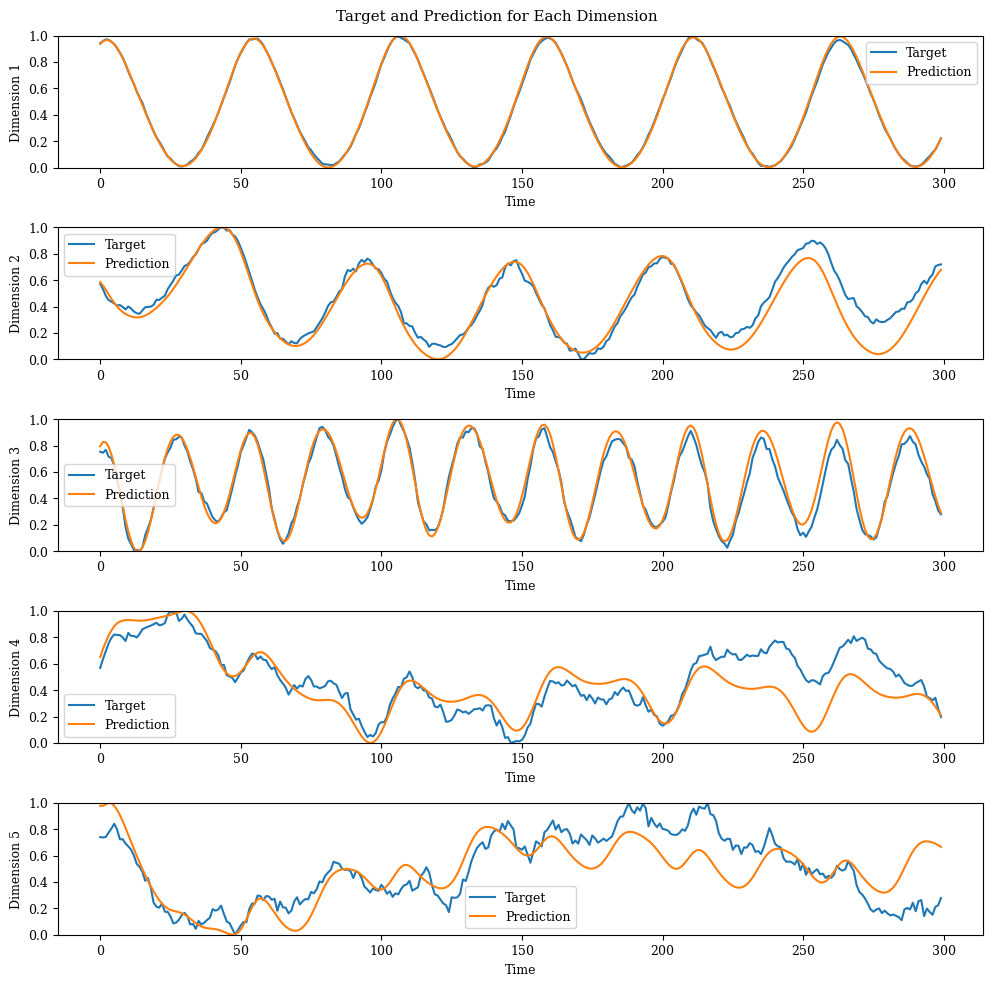

In [16]:
label = samples[2]
temp_target = targets[label]
temp_out = outputs[label]
num_dimensions = temp_target.shape[1]
# Create subplots
fig, axs = plt.subplots(num_dimensions, 1, figsize=(10, 10))
# Iterate over each dimension
for dim in range(num_dimensions):
    # Normalize target and output arrays for current dimension
    target_dim = temp_target[:, dim]
    out_dim = temp_out[:, dim]
    
    norm_target_dim = normalize_array(target_dim)
    norm_out_dim = normalize_array(out_dim)
    
    # Plot target and output arrays
    axs[dim].plot(norm_target_dim, label='Target')
    axs[dim].plot(norm_out_dim, label='Prediction')
    
    # Set y-axis limits to [0, 1]
    axs[dim].set_ylim(0, 1)
    
    # Add labels and legend
    axs[dim].set_xlabel('Time')
    axs[dim].set_ylabel(f'Dimension {dim+1}')
    axs[dim].legend()

# Add title
plt.suptitle('Target and Prediction for Each Dimension')
# Adjust layout
plt.tight_layout()

# Plot frequency
plt.show()

In [27]:
np.allclose(temp_target[pl_max-1],data_train[dl_max+pl_max-1]) ##dl_max'th week is being predicted

True

In [28]:
print(data_train[dl_max+pl_max-1])
print(temp_out[pl_max-1])

[-251.78888    79.78663   -57.664387  -43.183533  -26.46627 ]
[-249.85383404   67.50737921  -52.14596305  -50.14109459    9.56836443]


In [29]:
recon_data_ml = np.matmul(modes,data_train[dl_max+pl_max-1].T).T
recon_data_ml = recon_data_ml + train_data_mean[None,]
recon_data = np.copy(train_data[dl_max+pl_max-1])
recon_data = recon_data.reshape(1,180*360)
recon_data[0,mask] = recon_data_ml
recon_data = recon_data.reshape(1,180,360)

pred_data_ml = np.matmul(modes,temp_out.T).T
pred_data_ml = pred_data_ml + train_data_mean[None,]
pred_data = np.copy(train_data[dl_max:dl_max+pl_max])
pred_data = pred_data.reshape(pl_max,180*360)
pred_data[:,mask] = pred_data_ml
pred_data = pred_data.reshape(pl_max,180,360)
new_mask = np.load('Data/mask',allow_pickle=True)

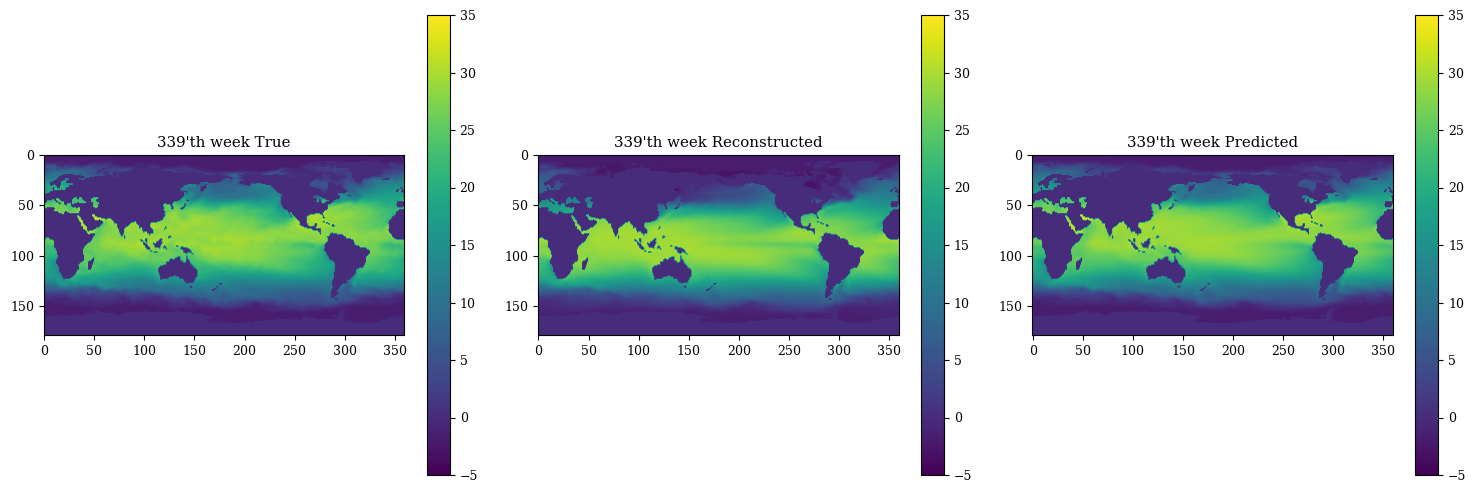

In [34]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
axs[0].imshow(train_data[dl_max+pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[0].set_title("{}'th week True".format(dl_max+pl_max-1))
fig.colorbar(axs[0].imshow(train_data[dl_max] * new_mask[0], vmin=-5, vmax=35), ax=axs[0], orientation='vertical')

# Plot the second subplot
axs[1].imshow(recon_data[0] * mask[0], vmin=-5, vmax=35)
axs[1].set_title("{}'th week Reconstructed".format(dl_max+pl_max-1))
fig.colorbar(axs[1].imshow(recon_data[0] * new_mask[0], vmin=-5, vmax=35), ax=axs[1], orientation='vertical')

# Plot the third subplot
axs[2].imshow(pred_data[pl_max-1] * mask[0], vmin=-5, vmax=35)
axs[2].set_title("{}'th week Predicted".format(dl_max+pl_max-1))
fig.colorbar(axs[2].imshow(pred_data[0] * new_mask[0], vmin=-5, vmax=35), ax=axs[2], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

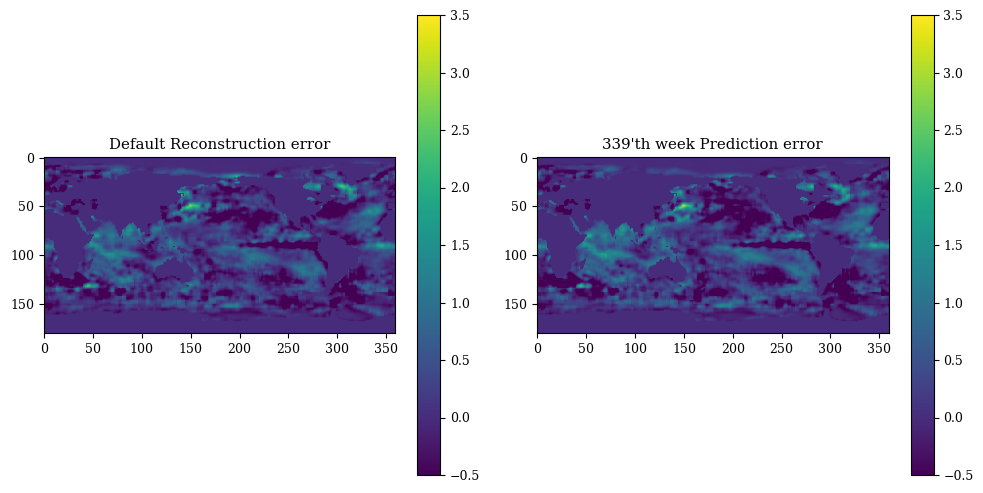

In [44]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow((train_data[dl_max+pl_max-1] - recon_data[0]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[0].set_title("Default Reconstruction error")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Plot the second subplot
im2 = axs[1].imshow((train_data[dl_max+pl_max-1] - pred_data[pl_max-1]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[1].set_title("{}'th week Prediction error".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

In [43]:
temp_true = train_data[dl_max:dl_max+pl_max]
rmse_pred = np.sqrt(np.mean((temp_true-pred_data)**2))
print(rmse_pred)

0.5002304
